SVM - mean accuracies (std) 
 cat (specificity): 0.814583 (0.093611) 
 dog (recall): 0.784615 (0.053571) 
 overall: 0.799000 (0.052335) 

LogReg - mean accuracies (std) 
 cat (specificity): 0.783333 (0.107529) 
 dog (recall): 0.748077 (0.073455) 
 overall: 0.765000 (0.057228) 

RF - mean accuracies (std) 
 cat (specificity): 0.702083 (0.106454) 
 dog (recall): 0.765385 (0.065385) 
 overall: 0.735000 (0.068374) 

About 59.09 percent of mislabels by the SVM is shared by all models.
About 54.17 percent of mislabels by the LogReg is shared by all models.
About 41.94 percent of mislabels by the RF is shared by all models.


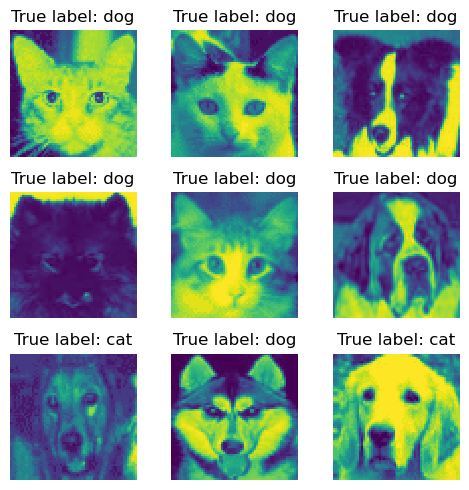

Fraction of missclassified dogs: 0.769231
Fraction of missclassified cats: 0.230769 
(according to algorithm)


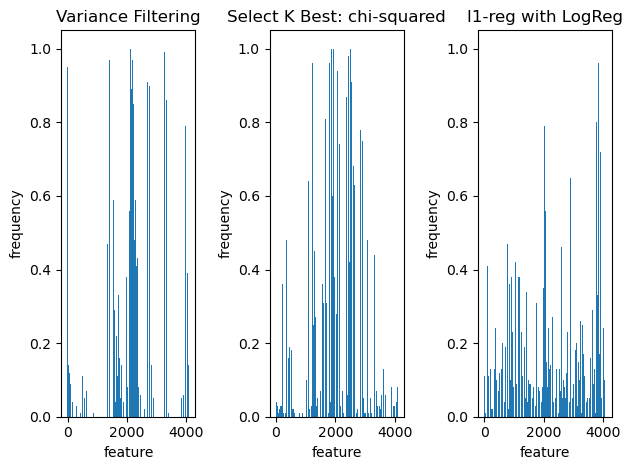

Number of features with frequency > 0.7 for variance filtering: 477 

Number of features with frequency > 0.7 for select K best: 533 

Number of features with frequency > 0.7 for lasso regularization: 146 

Number of features with frequency > 0.7 for shared: 198 



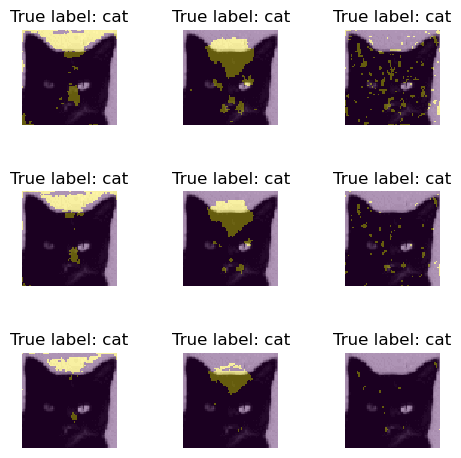

In [1]:
import ipynb.fs.full.q1a as q1a
import ipynb.fs.full.q1b as q1b

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans

def read_data_file(filename: str) -> pd.DataFrame:
    path = Path(os.getcwd() + 'q1a.ipynb')
    data_folder = str(path.parent.absolute()) + '/data/'
    return pd.read_csv(data_folder + filename)


features = read_data_file('CATSnDOGS.csv') / 255
labels = read_data_file('Labels.csv')

features_cpy = features.copy()
df = features_cpy.join(labels['x'].copy())

cat_features = df[df.x == 0]
cat_features.reset_index(inplace=True, drop=True)
cat_labels = cat_features.pop('x')

dog_features = df[df.x == 1]
dog_labels = dog_features.pop('x')
dog_features.reset_index(inplace=True, drop=True)

### CATS ###

In [4]:
cat_means = KMeans(n_clusters=2).fit(cat_features)
cat_cluster_labels = cat_means.labels_

tuned_models = q1a.tune_ensemble(q1a.models, cat_features, pd.DataFrame(cat_cluster_labels))
result = q1a.evaluate_ensemble(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels))
scores = q1a.calc_scores(result)

mean, std = q1a.average_scores(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels), iter=20)
mislabels = q1a.detect_mislabels(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels), iter=20, vote_limit=0.7)

SVM - mean accuracies (std) 
 cluster 1 (specificity): 0.990000 (0.023805) 
 cluster 2 (recall): 0.880000 (0.081240) 
 overall: 0.946000 (0.036387) 

LogReg - mean accuracies (std) 
 cluster 1 (specificity): 0.986667 (0.026667) 
 cluster 2 (recall): 0.940000 (0.073485) 
 overall: 0.968000 (0.027129) 

RF - mean accuracies (std) 
 cluster 1 (specificity): 0.970000 (0.039299) 
 cluster 2 (recall): 0.835000 (0.085294) 
 overall: 0.916000 (0.035553) 

About 66.67 percent of mislabels by the SVM is shared by all models.
About 66.67 percent of mislabels by the LogReg is shared by all models.
About 33.33 percent of mislabels by the RF is shared by all models.
{1, 42}


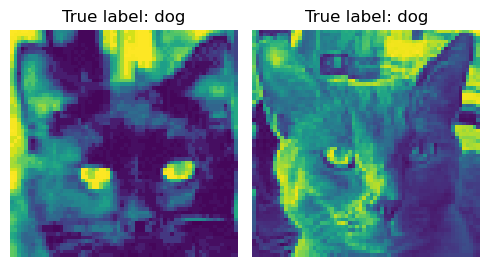

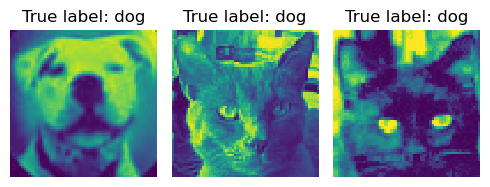

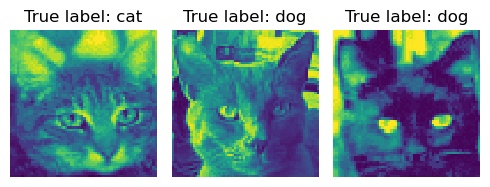

Fraction of missclassified cluster 1 cats: 1.000000 
(according to algorithm)
Fraction of missclassified cluster 2 cats: 0.000000


In [5]:
q1a.print_accuracy(mean, std, ['cluster 1', 'cluster 2'])

intersection = q1a.mislabel_intersection(mislabels)
q1a.plot_mislabeled_images(cat_features, pd.DataFrame(cat_cluster_labels), intersection)

tmp = labels.iloc[list(intersection), 0]
frac_mislabeled_cluster_2 = tmp.sum() / len(tmp)
frac_mislabeled_cluster_1 = 1 - frac_mislabeled_cluster_2
print('Fraction of missclassified cluster 1 cats: %f \n(according to algorithm)' % frac_mislabeled_cluster_1)
print('Fraction of missclassified cluster 2 cats: %f' % frac_mislabeled_cluster_2)

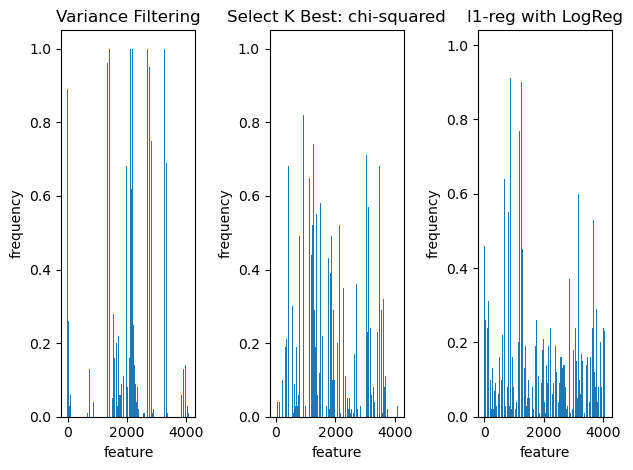

Number of features with frequency > 0.7 for variance filtering: 497 

Number of features with frequency > 0.7 for select K best: 272 

Number of features with frequency > 0.7 for lasso regularization: 90 

Number of features with frequency > 0.7 for shared: 35 



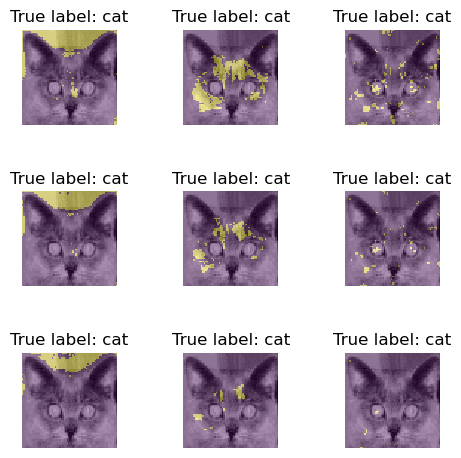

In [13]:
freq_df = q1b.bootstrap_selection_methods(cat_features, pd.DataFrame(cat_cluster_labels), iter=100)
titles = ['Variance Filtering', 'Select K Best: chi-squared', 'l1-reg with LogReg']
q1b.plot_feature_frequencies(freq_df, titles)

threshold = 0.7
methods_top_features = q1b.get_methods_top_features(freq_df, threshold)
top_filter = methods_top_features[0]
top_select = methods_top_features[1]
top_sparse = methods_top_features[2]

top_shared = top_filter.intersection(top_select).union(top_filter.intersection(top_sparse)).union(top_select.intersection(top_sparse))

top_feat = {"variance filtering": top_filter, "select K best": top_select, "lasso regularization": top_sparse, "shared": top_shared}
for type, feat in top_feat.items():
    print("Number of features with frequency > %s for %s: %d \n" %(threshold, type, len(feat)))

thresholds = [0.5, 0.7, 0.9]
q1b.plot_top_features(cat_features, pd.DataFrame(cat_cluster_labels), freq_df, thresholds)

### DOGS ###

In [6]:
dog_means = KMeans(n_clusters=2).fit(dog_features)
dog_cluster_labels = dog_means.labels_

tuned_models = q1a.tune_ensemble(q1a.models, dog_features, pd.DataFrame(dog_cluster_labels))
result = q1a.evaluate_ensemble(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels))
scores = q1a.calc_scores(result)

mean, std = q1a.average_scores(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels), iter=20)
mislabels = q1a.detect_mislabels(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels), iter=20, vote_limit=0.7)

In [ ]:
q1a.print_accuracy(mean, std, ['cluster 1', 'cluster 2'])

intersection = q1a.mislabel_intersection(mislabels)
q1a.plot_mislabeled_images(dog_features, dog_cluster_labels, intersection)

tmp = labels.iloc[list(intersection), 0]
frac_mislabeled_cluster_2 = tmp.sum() / len(tmp)
frac_mislabeled_cluster_1 = 1 - frac_mislabeled_cluster_2
print('Fraction of missclassified cluster 1 dogs: %f \n(according to algorithm)' % frac_mislabeled_cluster_1)
print('Fraction of missclassified cluster 2 dogs: %f' % frac_mislabeled_cluster_2)

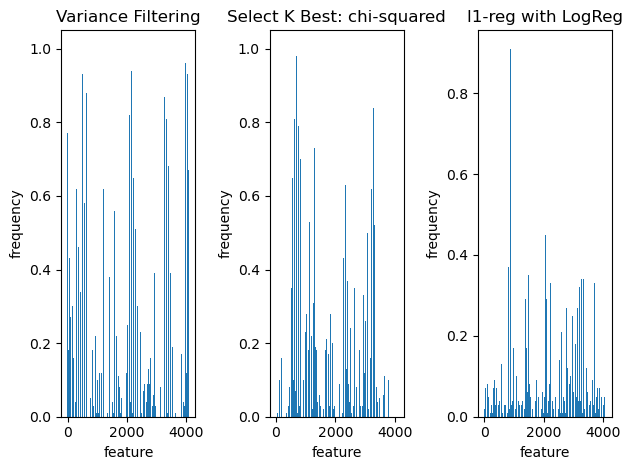

Number of features with frequency > 0.7 for variance filtering: 319 

Number of features with frequency > 0.7 for select K best: 204 

Number of features with frequency > 0.7 for lasso regularization: 17 

Number of features with frequency > 0.7 for shared: 24 



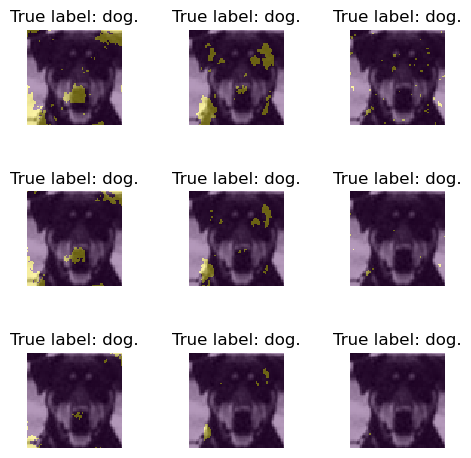

In [14]:
freq_df = q1b.bootstrap_selection_methods(dog_features, pd.DataFrame(dog_cluster_labels), iter=100)
titles = ['Variance Filtering', 'Select K Best: chi-squared', 'l1-reg with LogReg']
q1b.plot_feature_frequencies(freq_df, titles)

threshold = 0.7
methods_top_features = q1b.get_methods_top_features(freq_df, threshold)
top_filter = methods_top_features[0]
top_select = methods_top_features[1]
top_sparse = methods_top_features[2]

top_shared = top_filter.intersection(top_select).union(top_filter.intersection(top_sparse)).union(top_select.intersection(top_sparse))

top_feat = {"variance filtering": top_filter, "select K best": top_select, "lasso regularization": top_sparse, "shared": top_shared}
for type, feat in top_feat.items():
    print("Number of features with frequency > %s for %s: %d \n" %(threshold, type, len(feat)))

thresholds = [0.5, 0.7, 0.9]
q1b.plot_top_features(dog_features, pd.DataFrame(dog_cluster_labels), freq_df, thresholds)